# Análisis y automatización de informes

En este apartado vamos importar archivos desde Excel, realizar un análisis mediante la librería pandas, y automatizar la realización de informes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [3]:
plt.close("all")

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

Una vez hemos importado todas las librería que necesitamos, lo primero que vamos a hacer es importar un fichero de Excel. En este caso, el fichero lo he descargado de la página de Wikipedia a través del asistente disponible en Excel que nos permite importar tablas desde páginas web.

Pandas contiene una serie de funciones que nos permiten importar ficheros de distintas clases, si ponemos pd.read y a continuación damos a tabulador podemos comprobar que nos permite leer ficheros csv, excel, json, etc. Nos tenemos que asegurar que nuestro archivo python y el archivo que queremos importar se encuentran guardados en el mismo sitio, y a partir de aquí solo debemos indicar el nombre del mismo más la terminación.

Igualmente podemos indicar si tiene encabezados, si queremos que esté indexado por alguna de sus columnas o cualquier otro parametro.


In [6]:
IBEX = pd.read_excel("IBEX.xlsx")

Una vez importado podemos ver nuestro archivo:

In [7]:
IBEX

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93


Mediante info(), podemos saber el nombre de nuestras columnas, y qué tipo de datos forma nuestro archivo. En este caso son 7 columnas, con un total de 35 filas (de la 0 a la 34), siendo entrada y ponderación de tipo númerico, mientras el resto son nombres. 

In [8]:
IBEX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticker       35 non-null     object 
 1   Empresa      35 non-null     object 
 2   Sede         35 non-null     object 
 3   Entrada      35 non-null     int64  
 4   Sector       35 non-null     object 
 5   ISIN         35 non-null     object 
 6   Ponderación  35 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.0+ KB


Continuamos ahora buscando más información de las empresas que componen el Ibex. Ahora vamos a extraer información de sus cotizaciones y vamos a complementar la información que disponemos. 

En primer lugar, generamos una lista con la columna Ticker, que son los simbolos que utiliza Yahoo Finance para realizar publicaciones. 

In [9]:
simbolos = IBEX['Ticker'].tolist() + ['^IBEX']
cotizaciones = yf.download(simbolos, period='3mo', auto_adjust=True)


[*********************100%***********************]  36 of 36 completed


A continuación podemos ver que hemos extraído la información de cotización de las empresas en los últimos 3 meses. Vamos a calcular la Beta de las empresas, y añadir la columna en el DataFrame Ibex

In [10]:
cotizaciones

Close                                                    \
               ACS.MC  ACX.MC     AENA.MC ALM.MC     AMS.MC      ANA.MC   
Date                                                                      
2021-01-22  27.000000   9.376  130.699997  11.54  54.840000  128.800003   
2021-01-25  26.469999   9.202  128.699997  11.49  52.259998  129.000000   
2021-01-26  26.250000   9.356  128.500000  11.53  53.439999  132.600006   
2021-01-27  25.469999   9.106  126.900002  11.59  53.560001  123.000000   
2021-01-28  26.260000   9.354  131.600006  11.44  54.360001  126.599998   
...               ...     ...         ...    ...        ...         ...   
2021-04-16  28.059999  11.765  138.649994  12.55  58.400002  140.500000   
2021-04-19  28.400000  11.650  141.050003  12.71  59.099998  140.199997   
2021-04-20  27.219999  11.505  134.699997  12.69  56.139999  139.800003   
2021-04-21  27.080000  11.570  135.399994  12.88  57.599998  138.699997   
2021-04-22  27.379999  11.715  135.699997  12.92  58.500000  140.699997   

                                                 ...  Volume           \
           BBVA.MC    BKT.MC CABK.MC     CIE.MC  ...  PHM.MC   REE.MC   
Date                                             ...                    
2021-01-22  4.0020  4.887328  2.0520  21.559999  ...  187368  1221063   
2021-01-25  3.8870  4.663374  1.9905  20.740000  ...  118569  1150619   
2021-01-26  3.9440  4.778324  2.0120  21.400000  ...  840370  1726413   
2021-01-27  3.8350  4.552389  1.9475  21.000000  ...  639250  2047521   
2021-01-28  3.9410  4.703012  2.0230  21.500000  ...  204542  1510126   
...            ...       ...     ...        ...  ...     ...      ...   
2021-04-16  4.3625  5.800000  2.5580  23.920000  ...   62112  1733751   
2021-04-19  4.5135  5.892000  2.5940  23.440001  ...   88487  1926112   
2021-04-20  4.3125  5.640000  2.4990  23.540001  ...   80747  1650195   
2021-04-21  4.2855  5.600000  2.5190  23.799999  ...   94399   812912   
2021-04-22  4.3635  5.490000  2.5460  24.459999  ...   49097   241261   

                                                                              \
              REP.MC    SAB.MC    SAN.MC  SGRE.MC   SLR.MC    TEF.MC  VIS.MC   
Date                                                                           
2021-01-22  12828860  82590017  82196849   918163   851068  18359320   99592   
2021-01-25   8274994  42911454  50395819  1216059   729093   9356340   62017   
2021-01-26   6075048  33514549  39204006   910353  1608656   7631577   51337   
2021-01-27  11641234  45902842  55168498  1735892  3004067  13782732  105124   
2021-01-28   5489463  35972289  48708942  1515830  3010725  14697317  149635   
...              ...       ...       ...      ...      ...       ...     ...   
2021-04-16  10090827  25541663  37246275  6751795  6929989  16582943   73447   
2021-04-19   4130809  35412137  75691120   989139  2525252  12872013  123346   
2021-04-20  10296071  33291719  79870076  1353041  1919354  16845390   66345   
2021-04-21   6710269  36341886  70693560  1057005  1487499  10175787   61951   
2021-04-22   1696761  12850931   6630513   341441   585114   3202359   22420   

                       
                ^IBEX  
Date                   
2021-01-22  233703000  
2021-01-25  218852300  
2021-01-26  177642900  
2021-01-27  208275300  
2021-01-28  201655300  
...               ...  
2021-04-16  176861600  
2021-04-19  171375300  
2021-04-20  214621600  
2021-04-21  175189200  
2021-04-22   46304002  

[63 rows x 180 columns]

In [11]:
renta = np.log(1 + cotizaciones.loc[:,'Close'].pct_change()).dropna(how = 'all') #calculamos la rentabilidad
var = renta['^IBEX'].var() #calculamos la varianza del mercado
beta = renta.cov()/var #calculamos la beta con la covarianza de los valores
beta = beta['^IBEX'].head(35).to_frame('Beta') #selecionamos la columna de Ibex, que nos da las Betas de todos los valores, y renombramos la columna
beta = beta.reset_index() #quitamos el índice para convertirlo en columna
beta = beta.rename(columns={'index':'Ticker'}) #renombramos la columna para que coincida con DF Ibex

In [12]:
beta

,Ticker,Beta
0,ACS.MC,1.198084
1,ACX.MC,1.139626
2,AENA.MC,1.216978
3,ALM.MC,0.119019
4,AMS.MC,1.827750
5,ANA.MC,0.443059
6,BBVA.MC,1.875505
7,BKT.MC,1.435555
8,CABK.MC,1.109098
9,CIE.MC,0.307199


In [13]:
beta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  35 non-null     object 
 1   Beta    35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Vemos que nuestro DF beta contiene 35 filas, con dos columnas, una de ellas es ticker, que coincide con el DF Ibex, que usaremos para unir ambos dataframe.

In [14]:
unir  = pd.merge(IBEX, beta, on='Ticker', how='outer')
unir

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.443059
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,1.139626
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.198084
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.216978
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.119019
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.827750
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.508449
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.688265
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.508249
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.435555


Vamos a añadir ahora el precio del día. Para ello vamos a extraer el dato de la cotización del día, y después lo vamos a añadir a nuestro dataframe.

In [15]:
simbolos = unir['Ticker'].tolist()
cotizaciones = yf.download(simbolos, period='1d', auto_adjust=True)

[*********************100%***********************]  35 of 35 completed


In [16]:
cotiza = cotizaciones.loc[:,'Close'].T #Selecionamos el precio de cierre del día, y trasponemos la columna
cotiza = cotiza.reset_index() #quitamos el index, para dejar los ticker como una columna más
cotiza.columns=['Ticker','Precio del día'] #renombramos las columnas
cotiza

,Ticker,Precio del día
0,ACS.MC,27.379999
1,ACX.MC,11.715000
2,AENA.MC,135.699997
3,ALM.MC,12.920000
4,AMS.MC,58.500000
5,ANA.MC,140.699997
6,BBVA.MC,4.363500
7,BKT.MC,5.490000
8,CABK.MC,2.546000
9,CIE.MC,24.459999


In [17]:
cotiza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ticker          35 non-null     object 
 1   Precio del día  35 non-null     float64
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


Ahora volemos a unir nuestros dataframe, y podemos comprobar que tenemos incorporado el precio del día.

In [18]:
unido = pd.merge(unir, cotiza, on='Ticker', how="outer")

In [19]:
unido

,Ticker,Empresa,Sede,Entrada,Sector,ISIN,Ponderación,Beta,Precio del día
0,ANA.MC,Acciona,Alcobendas,2015,Construcción,ES0125220311,1.37,0.443059,140.699997
1,ACX.MC,Acerinox,Madrid,2015,"Mineral, metales y transformación",ES0132105018,0.52,1.139626,11.715000
2,ACS.MC,Grupo ACS,Madrid,1998,Construcción,ES0167050915,1.53,1.198084,27.379999
3,AENA.MC,Aena,Madrid,2015,Transporte y distribución,ES0105046009,3.61,1.216978,135.699997
4,ALM.MC,Almirall,Barcelona,2020,Productos farmacéuticos y biotecnología,ES0157097017,0.40,0.119019,12.920000
5,AMS.MC,Amadeus IT Group,Madrid,2011,Electrónica y software,ES0109067019,4.74,1.827750,58.500000
6,MTS.MC,ArcelorMittal,Luxemburgo,2009,"Mineral, metales y transformación",LU1598757687,4.75,1.508449,24.340000
7,SAB.MC,Banco Sabadell,Alicante,2004,Bancos y cajas de ahorro,ES0113860A34,0.45,1.688265,0.454100
8,SAN.MC,Banco Santander,Santander,1992,Bancos y cajas de ahorro,ES0113900J37,8.75,1.508249,2.827500
9,BKT.MC,Bankinter,Madrid,1992,Bancos y cajas de ahorro,ES0113679I37,0.93,1.435555,5.490000


Podemos convertir nuestro dataframe en una tabla dinámica mediante pivot_table, y comprobamos que utiliza los campos númericos para realizar esta tabla

In [20]:
unido.pivot_table(index = "Ticker")

,Beta,Entrada,Ponderación,Precio del día
Ticker,,,,
ACS.MC,1.198084,1998,1.53,27.379999
ACX.MC,1.139626,2015,0.52,11.715000
AENA.MC,1.216978,2015,3.61,135.699997
ALM.MC,0.119019,2020,0.40,12.920000
AMS.MC,1.827750,2011,4.74,58.500000
ANA.MC,0.443059,2015,1.37,140.699997
BBVA.MC,1.875505,1992,5.12,4.363500
BKT.MC,1.435555,1992,0.93,5.490000
CABK.MC,1.109098,2009,3.70,2.546000


Podemos crear una tabla dinamica asignando distinta información. Index nos marcará la columna de la izquierda, siendo el índice de la tabla dinamica. Columns serán las columnas asignadas, y values serán los valores que queremos ver. Finalmente, para rellenar los huecos vacíos utilizamos fillna(0). 

Esta tabla no nos aporta mucha información, tan solo es n ejemplo de lo que podemos hacer con los datos.

In [21]:
unido.pivot_table(index = "Sede", columns='Entrada', values='Beta').fillna(0)

Entrada,1969,1992,1998,1999,2000,2001,2003,2004,2007,2008,2009,2011,2015,2016,2017,2018,2020
Sede,,,,,,,,,,,,,,,,,
Alcobendas,0.000000,0.000000,0.000000,0.992781,0.214074,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.443059,0.000000,0.000000,0.000000,0.000000
Alicante,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.688265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arteijo,0.000000,0.000000,0.000000,0.000000,0.000000,1.098059,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Barcelona,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.279552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119019
Bilbao,0.000000,1.131924,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307199,0.000000
Colmenar Viejo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.605540
Luxemburgo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.508449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Madrid,0.000000,0.826947,1.198084,1.366307,0.000000,0.000000,0.30305,0.000000,0.536241,0.000000,0.000000,1.970768,1.082995,0.071550,0.000000,0.549308,2.178180
Majadahonda,0.000000,0.780857,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Medante describe obtenemos los datos estadísticos principales siemple de los datos númericos. 

In [22]:
unido.describe()

,Entrada,Ponderación,Beta,Precio del día
count,35.000000,35.000000,35.000000,35.000000
mean,2005.285714,2.854857,0.925561,26.884646
std,11.942439,3.356235,0.613757,33.956973
min,1969.000000,0.230000,-0.068801,0.454100
25%,1995.000000,0.615000,0.415700,7.137500
50%,2008.000000,1.530000,0.876297,17.620001
75%,2015.500000,3.805000,1.400931,26.865000
max,2020.000000,15.250000,2.178180,140.699997


Además podemos usar groupby para agrupar, y luego realizar calculor. En la siguiente línea agrupamos por segmentos y después sumamos las ponderaciones, con ello obtenemos información acerca de los sectores más influyentes en el Ibex35.

In [67]:
sector = unido.groupby('Sector').Ponderación.sum().nlargest(5)
sector

Sector
Electricidad y gas                   22.19
Bancos y cajas de ahorro             18.95
Textil, vestido y calzado            15.25
Telecomunicaciones y otros            7.83
Mineral, metales y transformación     5.75
Name: Ponderación, dtype: float64

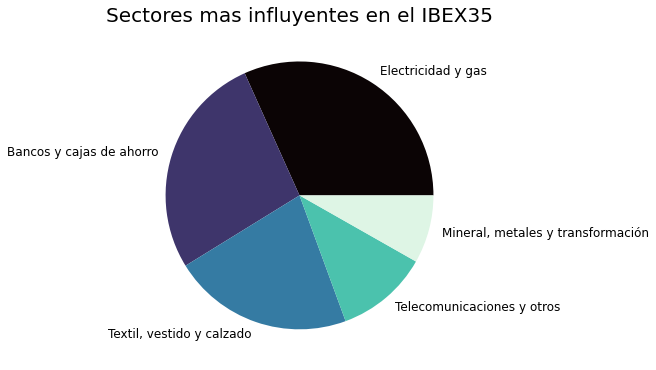

In [104]:
plt.figure(figsize=(6,10))
sector.plot(kind='pie',  subplots=True, fontsize=12, ylabel='', colormap ='mako') #colormap nos permite elegir el color del gráfico
plt.title("Sectores mas influyentes en el IBEX35", fontsize=20)

plt.savefig("Ibex.jpg", bbox_inches='tight') #nos guarda la imagen

plt.show()

Estos son todos los colores que podemos elegir en el gráfico:

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'


Podemos hacer también una tabla donde visualizar las ponderaciones del Ibex

In [25]:
Pondera = unido.pivot_table(index = "Sector", values='Ponderación', aggfunc='sum')
Pondera = Pondera.sort_values(by='Ponderación', ascending=False)
Pondera = Pondera.reset_index()
Pondera

,Sector,Ponderación
0,Electricidad y gas,22.19
1,Bancos y cajas de ahorro,18.95
2,"Textil, vestido y calzado",15.25
3,Telecomunicaciones y otros,7.83
4,"Mineral, metales y transformación",5.75
5,Construcción,5.74
6,Transporte y distribución,5.63
7,Electrónica y software,4.97
8,Fabricación y montaje de bienes de equipo,3.91
9,Petróleo,2.99


A su vez, de nuestra tabla, podemos hacer listas que posteriormente utilizaremos en nuestro word para crear una tabla que irá insertada en nuestro documento.

In [106]:
sectores = Pondera['Sector'].tolist()
ponderaciones = Pondera['Ponderación'].tolist()

Podemos hacer un gráfico de barras horizontales con el número de empresas según los sectores que forman el Ibex35.

Realizamos estos gráficos, no tanto por la aportación de información, sino para mostrar las distintas posibilidades que existen a la hora de crear gráficos, y poder compaginar la información.

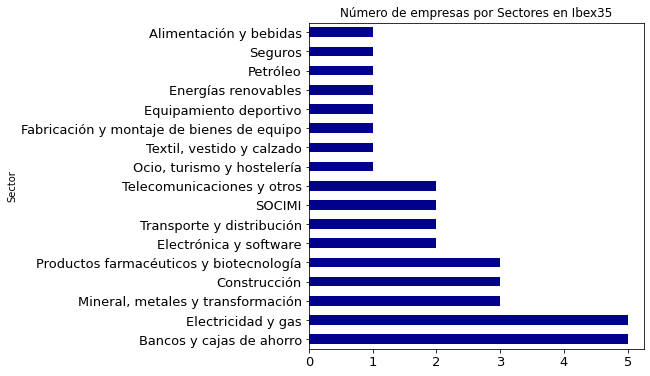

In [119]:
listaEmpresas = unido.groupby('Sector').Empresa.count().sort_values(ascending=False)
listaEmpresas.plot(kind='barh', figsize=(6,6), fontsize=13, color="darkblue")
plt.title("Número de empresas por Sectores en Ibex35")

plt.savefig("NumeroEmpresas.jpg", bbox_inches='tight')

plt.show()

Ahora vamos a hacer un gráfico en el que se muestran las 5 ciudades en las que más empresas del Ibex tienen su sede. Madrid, seguida de Alcobendas y Bilbao contienen el mayor número de empresas.

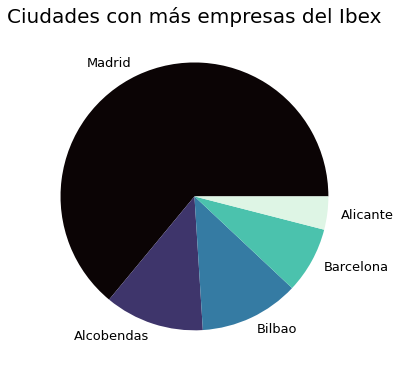

In [110]:
lugar = unido.groupby('Sede').Empresa.count().nlargest(5)
lugar.plot(kind='pie',  subplots=True, figsize=(6,10), fontsize=13, ylabel='', colormap='mako')
plt.title('Ciudades con más empresas del Ibex', fontsize=20)

plt.savefig("Ciudades.jpg", bbox_inches='tight') #es importante guardar la imagen antes de visualizarla, de lo contrario te guarda una imagen en blanco

plt.show()


Por último comprobamos el número de empresas que han entrado a formar parte del Ibex por año

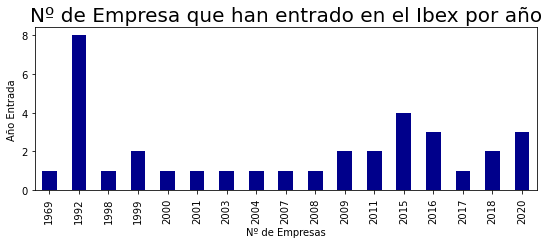

In [121]:
entrada = unido.groupby('Entrada').Empresa.count()
entrada.plot(kind='bar',  subplots=True, figsize=(9,3), fontsize=10, ylabel='', color='darkblue')
plt.title("Nº de Empresa que han entrado en el Ibex por año", fontsize=20)
plt.ylabel('Año Entrada')
plt.xlabel('Nº de Empresas')

plt.savefig("Empresa.jpg", bbox_inches='tight')


plt.show()




In [34]:
pip install python-docx

Note: you may need to restart the kernel to use updated packages.


Vamos a crear ahora un informe en Word automatizado para que guarde nuestras imagenes

In [35]:
from docx import Document
from docx import shared
from docx.shared import Cm

In [36]:
print(dir(shared))

['Cm', 'ElementProxy', 'Emu', 'Inches', 'Length', 'Mm', 'Parented', 'Pt', 'RGBColor', 'Twips', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'absolute_import', 'lazyproperty', 'print_function', 'unicode_literals', 'write_only_property']


In [138]:
document = Document()
document.add_heading("ANÁLISIS DE IBEX_35", level=0)
document.add_heading("1. Carácterísticas del Ibex35", level=1)
document.add_paragraph("El Ibex se compone de las 35 empresas con más liquidez que cotizan en el sistema bursátil español que está formado por las bolsas de Madrid, Valencia, Barcelona y Bilbao. Por ello se utiliza como referencia para conocer la situación de la Bolsa española.")
document.add_paragraph("Si comprobamos la distribución por sectores, podemos comprobar que Electricidad y Gas es el sector más representativo, ya que supone un 22% del Ibex, seguido de la Banca, Textil y calzado, Telecomunicaciones y Minerales-transformación.")

document.add_picture("Ibex.jpg", width=Cm(11))

document.add_paragraph("El gráfico nos muestra los 5 sectores más representativos, siendo un total de 17 sectores los que están representados en el Ibex.35")
document.add_paragraph("En la siguiente tabla comprobamos la distribución por sectores del Ibex")

table = document.add_table(rows=1, cols=2, style='Colorful Shading Accent 5')


table.rows[0].cells[0].text = 'Sectores'
table.rows[0].cells[1].text = 'Ponderación'

for i,p  in zip(sectores, ponderaciones):
    row_cells = table.add_row().cells
    row_cells[0].text = i
    row_cells[1].text = str(round(p,2)) + '%'
    
document.add_paragraph("")
document.add_paragraph("En el siguiente gráfico podemos comprobar el número de empresas totales por sector")    
document.add_picture("NumeroEmpresas.jpg", width=Cm(10), height=Cm(8))

document.add_paragraph('')
document.add_paragraph('En el siguiente gráfico vemos las 5 ciudades donde más empresas tienen sus sedes.')
document.add_picture("Ciudades.jpg", width=Cm(7))
document.add_paragraph("""Madrid es la ciudad donde más empresas tienen su sede, seguido de Alcobendas y Bilbao. Después le siguen Barcelona y Alicante. 
Posiblemente podemos encontrar distintos motivos por los que la empresas deciden establecer su sede en un punto geográfico y no otro, así las infraestructuras, la innovación tecnológica o su capital humano son factores que influyen a la hora de establecer la sede de una empresa.""")

document.add_paragraph('')
document.add_paragraph('')

document.add_paragraph('El Ibex se creó en 1.992, por ello no es de extrañar que nos encontremos con el año en el que más entradas se produjeron en el Ibex.')
document.add_paragraph('En el siguiente gráfico podemos ver el número de entradas por año.')
document.add_picture('Empresa.jpg', width=Cm(12))
document.add_paragraph('Podemos ver una entrada en el año 1969, que probablemente sea un error publicado en la fuente de origen de los datos, Wikipedia, puesto que la creación del Ibex fue en 1.992, y por tanto el año 1969 debe ser el año de creación de la propia empresa.')      



document.save('Ibex.docx')

Con esto hemos comprobado que podemos hacer un informe totalmente automatizacido.